<a href="https://colab.research.google.com/github/HyunVinh/AI/blob/main/food.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import cv2
import numpy as np
import pandas as pd
import seaborn as ses
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score,recall_score,confusion_matrix,classification_report,accuracy_score,f1_score


from keras.layers import Dense, Activation, Dropout, BatchNormalization, LSTM,Conv2D, MaxPooling2D, Flatten
from keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical ,load_img, img_to_array
from tensorflow.keras.optimizers import RMSprop,SGD
from tensorflow.keras.models import load_model
from keras import callbacks
from keras.callbacks import EarlyStopping,ReduceLROnPlateau

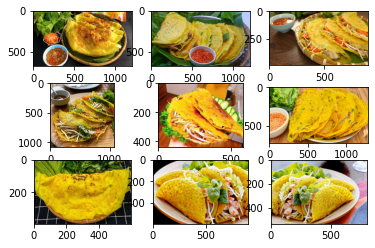

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.image import imread
folder = '/content/drive/MyDrive/Colab Notebooks/monan/train/banhxeo/'
for i in range(9):
  plt.subplot(330+i+1)
  filename = folder + str(i) + '.jpg'
  image = imread(filename)
  plt.imshow(image)
plt.show()

In [ ]:
model=Sequential() #CNN
model.add(Conv2D(32,(3,3),activation='relu',input_shape=(200,200,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2))) # tìm giá trị lớn nhất trong ma trận 8x8 để làm cho ảnh có độ nổi lên
model.add(Dropout(0.25))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten()) #ANN
model.add(Dense(128,activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(10,activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='rmsprop',metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 198, 198, 32)      896       
                                                                 
 batch_normalization_4 (Batc  (None, 198, 198, 32)     128       
 hNormalization)                                                 
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 99, 99, 32)       0         
 2D)                                                             
                                                                 
 dropout_4 (Dropout)         (None, 99, 99, 32)        0         
                                                                 
 conv2d_4 (Conv2D)           (None, 97, 97, 64)        18496     
                                                                 
 batch_normalization_5 (Batc  (None, 97, 97, 64)      

In [ ]:
image_generator = ImageDataGenerator(rotation_range=15,
                                rescale=1./255,
                                shear_range=0.1,
                                zoom_range=0.2,
                                horizontal_flip=True,
                                width_shift_range=0.1,
                                height_shift_range=0.1
                                )   

train_dataset = image_generator.flow_from_directory(batch_size=10,
                                                 directory='/content/drive/MyDrive/Colab Notebooks/monan/train/',
                                                 shuffle=True,
                                                 target_size=(200, 200), 
                                                 subset="training",
                                                 class_mode='categorical')

validation_dataset = image_generator.flow_from_directory(batch_size=10,
                                                 directory='/content/drive/MyDrive/Colab Notebooks/monan/test/',
                                                 shuffle=True,
                                                 target_size=(200, 200), 
                                                 subset="validation",
                                                 class_mode='categorical')

Found 100 images belonging to 10 classes.
Found 0 images belonging to 10 classes.


In [ ]:
history=model.fit(train_dataset,batch_size=10,epochs=40,verbose=1,
                  validation_data=validation_dataset)

Epoch 1/40
10/10 [==============================] - 27s 2s/step - loss: 2.6537 - accuracy: 0.1800
Epoch 2/40
10/10 [==============================] - 3s 261ms/step - loss: 1.9398 - accuracy: 0.3800
Epoch 3/40
10/10 [==============================] - 3s 259ms/step - loss: 1.5598 - accuracy: 0.4900
Epoch 4/40
10/10 [==============================] - 3s 266ms/step - loss: 1.4679 - accuracy: 0.4800
Epoch 5/40
10/10 [==============================] - 3s 268ms/step - loss: 1.2491 - accuracy: 0.5500
Epoch 6/40
10/10 [==============================] - 3s 256ms/step - loss: 1.1843 - accuracy: 0.5700
Epoch 7/40
10/10 [==============================] - 3s 253ms/step - loss: 1.4153 - accuracy: 0.5100
Epoch 8/40
10/10 [==============================] - 3s 263ms/step - loss: 1.1425 - accuracy: 0.5700
Epoch 9/40
10/10 [==============================] - 3s 263ms/step - loss: 1.1371 - accuracy: 0.6800
Epoch 10/40
10/10 [==============================] - 3s 262ms/step - loss: 0.8380 - accuracy: 0.6900
E

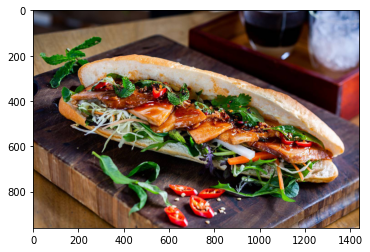

Day la  banh mi


In [ ]:
filename = '/content/drive/MyDrive/Colab Notebooks/monan/test/banhmi/13.jpg'  

img = mpimg.imread(filename)
imgplot = plt.imshow(img)
plt.show()

img = load_img(filename,target_size = (200,200))
img = img_to_array(img)
img =  img.reshape(1,200,200,3)
img = img.astype('float32')
img = img/255
kq = np.argmax(model.predict(img),axis= -1)
if kq==0:
  print('Day la banh chung')
elif kq ==1:
  print('Day la  banh mi')
elif kq ==2:
  print('Day la  banh plan')
elif kq ==3:
  print('Day la  banh xeo')
elif kq ==4:
  print('Day la  bun bo')
elif kq ==5:
  print('Day la bun dau')
elif kq ==6:
  print('Day la cha gio')
elif kq ==7:
  print('Day la com tam')
elif kq ==8:
  print('Day la cu kieu')
elif kq ==9:
  print('Day la pho')



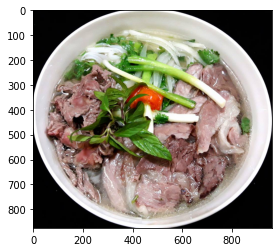

Day la pho


In [ ]:
filename = '/content/drive/MyDrive/Colab Notebooks/monan/test/pho/12.jpg'  

img = mpimg.imread(filename)
imgplot = plt.imshow(img)
plt.show()

img = load_img(filename,target_size = (200,200))
img = img_to_array(img)
img =  img.reshape(1,200,200,3)
img = img.astype('float32')
img = img/255
kq = np.argmax(model.predict(img),axis= -1)
if kq==0:
  print('Day la banh chung')
elif kq ==1:
  print('Day la  banh mi')
elif kq ==2:
  print('Day la  banh plan')
elif kq ==3:
  print('Day la  banh xeo')
elif kq ==4:
  print('Day la  bun bo')
elif kq ==5:
  print('Day la bun dau')
elif kq ==6:
  print('Day la cha gio')
elif kq ==7:
  print('Day la com tam')
elif kq ==8:
  print('Day la cu kieu')
elif kq ==9:
  print('Day la pho')

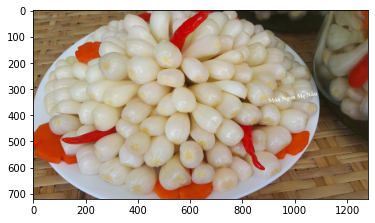

Day la cu kieu


In [ ]:
filename = '/content/drive/MyDrive/Colab Notebooks/monan/test/cukieu/11.jpg'  

img = mpimg.imread(filename)
imgplot = plt.imshow(img)
plt.show()

img = load_img(filename,target_size = (200,200))
img = img_to_array(img)
img =  img.reshape(1,200,200,3)
img = img.astype('float32')
img = img/255
kq = np.argmax(model.predict(img),axis= -1)
if kq==0:
  print('Day la banh chung')
elif kq ==1:
  print('Day la  banh mi')
elif kq ==2:
  print('Day la  banh plan')
elif kq ==3:
  print('Day la  banh xeo')
elif kq ==4:
  print('Day la  bun bo')
elif kq ==5:
  print('Day la bun dau')
elif kq ==6:
  print('Day la cha gio')
elif kq ==7:
  print('Day la com tam')
elif kq ==8:
  print('Day la cu kieu')
elif kq ==9:
  print('Day la pho')